**BLOOD  IMAGE CLASSIFICATION**

Machine learning is a field of study and is concerned with algorithms that learn from examples.

There are three types of machine learning, and they are:

*   Supervised Learning *where machine learning algorithm is trained on labeled data.*
*   Unsupervised Learning *where machine learning algorithm is trained to work without labeled data.*
*   Reinforced Learning *where the machine learning algorithm is trained to work bosed on a reward system.*

Image Classification is the task of assigning an input image, one label from a fixed set of categories. Image classification can be supervised or unsupervised

For this particular image classification problem, because the dataset used had no labels, unsupervised learning was used to carry out the classification.

In [1]:
from google.colab import drive

**The Dataset**

The dataset used for this classification was culled from https://www.kaggle.com/kmader/siim-medical-images?select=full_archive.npz and uploaded to google drive. The cell below indicates how the dataset was connected from google drive to colab.

In [2]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
import os
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
from skimage import filters
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

the size of the data is 512 pixel hieght and 512 pixel width
the minimum pixel value is 0.0
the maximum pixel value is 1.0
the mean pixel value is 0.26889974556717217
the standard deviation pixel value is 0.19028130901116055


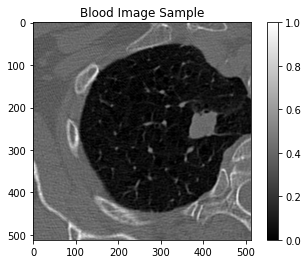

In [4]:
blood_img_1 = imread(r'/content/gdrive/My Drive/KAGGLE DATASET/BLOOD DATASET/image (7).png', as_gray= True)
plt.imshow(blood_img_1, cmap=cm.gray)
plt.colorbar()
plt.title('Blood Image Sample')
print(f"the size of the data is {blood_img_1.shape[0]} pixel hieght and {blood_img_1.shape[1]} pixel width")
print(f"the minimum pixel value is {blood_img_1.min()}")
print(f"the maximum pixel value is {blood_img_1.max()}")
print(f"the mean pixel value is {blood_img_1.mean()}")
print(f"the standard deviation pixel value is {blood_img_1.std()}")

plt.show()

In [5]:
blood_img_1.shape

(512, 512)

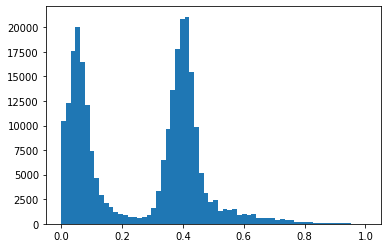

In [6]:
plt.hist(blood_img_1.ravel(),64,[0,1])
plt.show()

In [7]:
image_size = 512
def get_data(data_dir):
    data = []
    for img in os.listdir(data_dir):
        try:
            img_arr = imread(os.path.join(data_dir,img),as_gray=True)
            resized_arr = resize(img_arr,(image_size,image_size))
            data.append([img_arr])
        except Exception as e:
            print(e)
                
    return np.array(data)

In [8]:
blood_image_features = get_data(r'/content/gdrive/My Drive/KAGGLE DATASET/BLOOD DATASET/')
blood_image_features.shape

(376, 1, 512, 512)

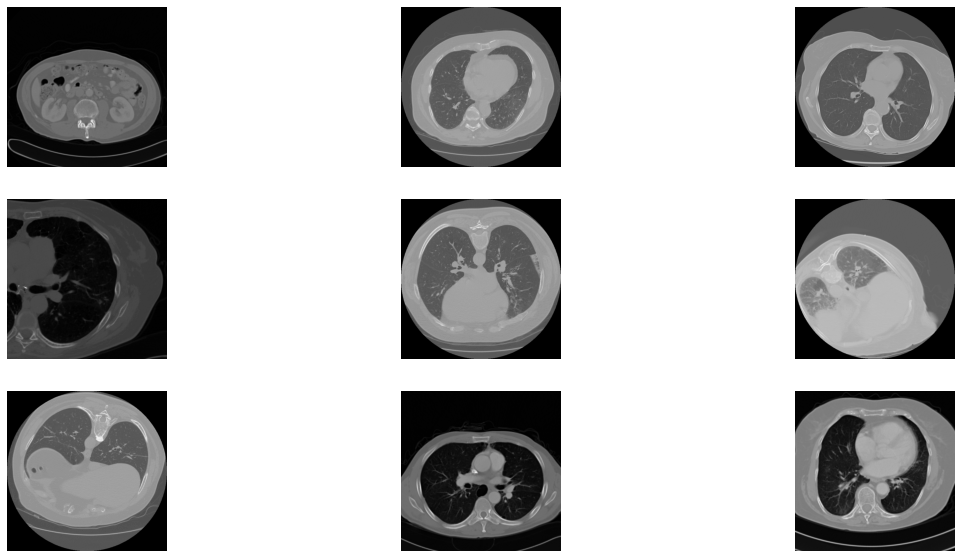

In [9]:
plt.figure(figsize=(20,10))

for i in range(9):
    num = np.random.randint(0, len(blood_image_features)-1)
    plt.subplot(3,3,i+1)
    plt.imshow(blood_image_features[num].reshape(blood_image_features.shape[2],blood_image_features.shape[3]), cmap='gray')
    plt.axis('off')

In [10]:
blood_image_features =  blood_image_features/255.0
reshaped_blood_feat = blood_image_features.reshape(len(blood_image_features),-1)
print(reshaped_blood_feat.shape)

(376, 262144)


In [11]:
reshaped_blood_feat

array([[4.61361015e-05, 1.53787005e-05, 0.00000000e+00, ...,
        1.23029604e-04, 4.61361015e-05, 1.53787005e-05],
       [1.53787005e-05, 1.53787005e-05, 1.53787005e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.61361015e-05, 1.53787005e-05, 0.00000000e+00, ...,
        1.23029604e-04, 4.61361015e-05, 1.53787005e-05],
       ...,
       [4.61361015e-05, 4.61361015e-05, 1.53787005e-05, ...,
        1.07650903e-04, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

**Agglemorative Clustering Algorithm**

The agglomerative clustering is the most common type of hierarchical clustering used to group objects (images) in clusters based on their similarity. It’s also known as AGNES (Agglomerative Nesting). The algorithm starts by treating each object as a singleton cluster. Next, pairs of clusters are successively merged until all clusters have been merged into one big cluster containing all objects. The result is a tree-based representation of the objects, named *dendrogram*.


**Algorithm**

Agglomerative clustering works in a “bottom-up” manner. That is, each object is initially considered as a single-element cluster (leaf). At each step of the algorithm, the two clusters that are the most similar are combined into a new bigger cluster (nodes). This procedure is iterated until all points are member of just one single big cluster (root) (see figure below).

The inverse of agglomerative clustering is divisive clustering, which is also known as DIANA (Divise Analysis) and it works in a “top-down” manner. It begins with the root, in which all objects are included in a single cluster. At each step of iteration, the most heterogeneous cluster is divided into two. The process is iterated until all objects are in their own cluster.

In [12]:
agg= AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='ward')
clusters = agg.fit_predict(reshaped_blood_feat)
clusters

array([3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 4, 0, 0, 3, 0, 4, 0, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 4, 4, 0, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 0, 1, 3, 3, 1, 3, 1, 3, 1, 3, 3, 0, 1, 0, 3, 3, 0, 0, 1,
       1, 1, 3, 3, 0, 4, 3, 1, 3, 3, 0, 1, 1, 1, 3, 1, 3, 1, 0, 3, 1, 1,
       0, 1, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 3, 0, 0, 3, 3, 4, 0, 3, 4,
       0, 3, 3, 3, 3, 4, 3, 3, 3, 3, 0, 1, 3, 1, 3, 3, 3, 0, 3, 3, 0, 0,
       0, 3, 0, 3, 3, 3, 0, 1, 0, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3,
       1, 3, 3, 3, 1, 0, 1, 3, 3, 3, 1, 3, 0, 3, 1, 3, 2, 2, 3, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 0, 3, 1, 0, 3,
       0, 3, 3, 0, 3, 3, 1, 1, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 2, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 3, 2, 1, 2, 1, 2, 1, 1, 3, 3, 2, 2, 3,
       3, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1,

In [13]:
g = len(np.unique(clusters))

cluster_index =[[] for i in range(g)]

for i,label in enumerate(clusters,0):
    for n in range(g):
        if label == n:
            cluster_index[n].append(i)
        else:
            continue
            
            
            

def show_cluster(num):       
    #fig = plt.figure(figsize=(20,10))
    clust = num

    num = 5
    for i in range(1,num):
        #fig.add_subplot(3,2,i+1)
        plt.imshow(reshaped_blood_feat[cluster_index[clust][i]].reshape(blood_image_features.shape[2],blood_image_features.shape[3]),cmap=cm.gray) 
        plt.show()

**Silhouette Coefficient**

Silhouette Coefficient or Silhouette Score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

The following steps can be applied to calculate the sihouette coefficient of a single sample in our dataset:
*1. Calculate the cluster cohesion $${a^{(i)}}$$ as the average distance between a sample $${x^{(i)}}$$ and all other points in the same cluster

*2 calculate the cluster separation $${b^{(i)}}$$ from the next closest cluster as the average distance between the sample $${x^{(i)}}$$ and all samples in the nearest cluster.

*3 Calculate the silhouette $${s^{(i)}}$$ as the difference between cluster cohesion and separation divided by the greater of the two as shown below:

Mathematical expression

$$s = \frac{b^{(i)} - a^{(i)}}{max{[b^{(i)},a^{(j)}]}}$$

silhouette_score(reshaped_blood_feat,clusters)

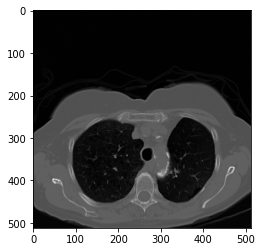

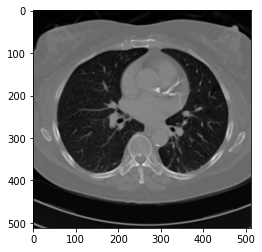

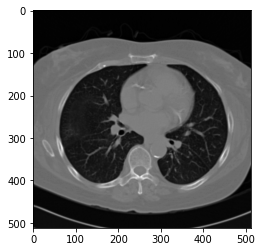

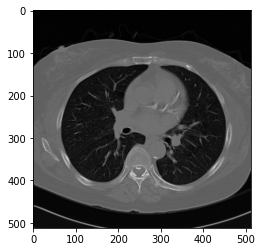

In [14]:
show_cluster(0)

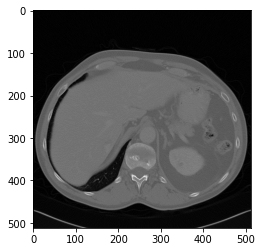

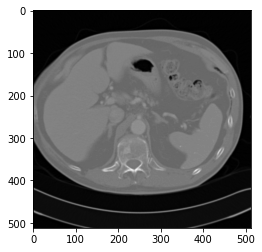

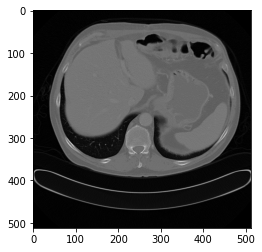

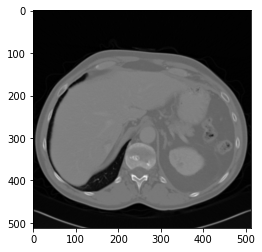

In [15]:
show_cluster(1)

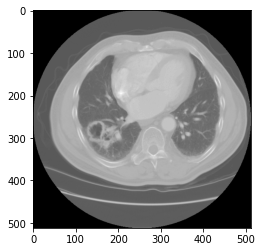

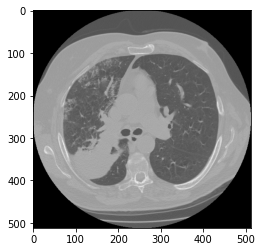

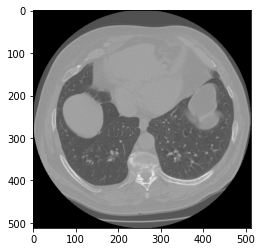

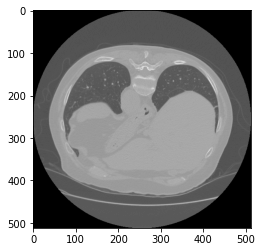

In [16]:
show_cluster(2)

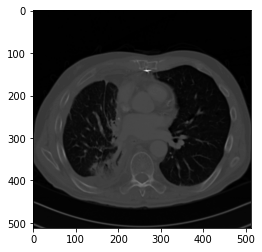

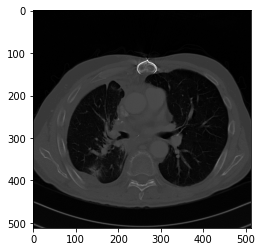

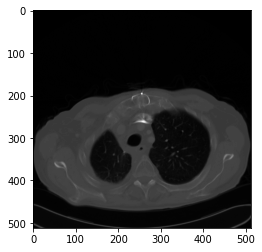

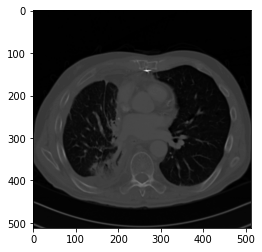

In [17]:
show_cluster(3)

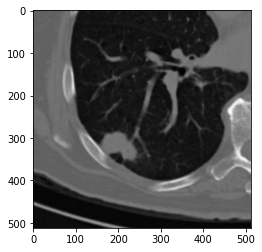

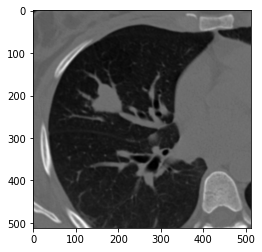

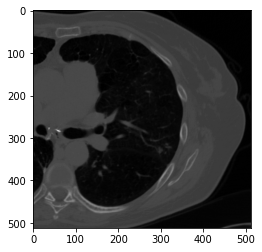

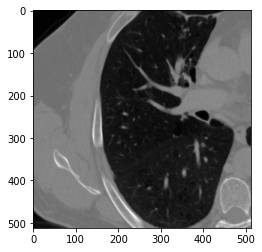

In [18]:
show_cluster(4)

From the visuals above, it can be seen that Agglomerative Clustering classifies:


*   cluster 0 as Acute Leukemia,
*   cluster 1 as Multiple Myeloma,
*   cluster 2 as Thrombocytopenia,
*   cluster 3 as Systemic Lupus Erythematosus SLE, and
*   cluster 4 as Lymphoma.